In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run /Users/fardila/Documents/GitHub/data-viz/Enia_project/code/individual_profs.py

In [3]:
dic = load("L0125", 100)

Loaded Profiles_Box_L0125_N1024_CBol_Np200_100.bhp from pickle, took 0.94 seconds


In [6]:
dic.keys()

dict_keys(['profiles', 'box_size', 'z', 'sim_name', 'cosmo_name', 'particle_mass'])

In [7]:
dic["profiles"].dtype.names

('id',
 'host_id',
 'Rvir_cat',
 'rs',
 'Mvir_cat',
 'vmax_cat',
 'a_last_mm',
 'x',
 'v',
 'Rbin',
 'Rbin_av',
 'mass',
 'vr',
 'sigmav',
 'vc',
 'vmax_prof',
 'potential',
 'R200c',
 'M200c',
 'R500c',
 'M500c')

In [8]:
dic["profiles"]["id"]

array([174015014, 174552465, 174154314, ..., 175589563, 175043208,
       175594875])

In [9]:
dic["profiles"]["potential"]

array([[-1.43341218e+06, -1.42398674e+06, -1.41396395e+06, ...,
        -3.05963290e+04, -1.60066774e+04,  0.00000000e+00],
       [-1.66513897e+06, -1.64915025e+06, -1.63253577e+06, ...,
        -5.09463114e+04, -2.53844480e+04,  0.00000000e+00],
       [-1.48592547e+06, -1.46580161e+06, -1.44515463e+06, ...,
        -2.31513027e+04, -1.18586370e+04,  0.00000000e+00],
       ...,
       [-5.23818546e+04, -5.22598185e+04, -5.21284618e+04, ...,
        -6.10041287e+03, -3.16572388e+03,  0.00000000e+00],
       [-1.58439295e+04, -1.51532714e+04, -1.44147041e+04, ...,
        -4.94135982e+02, -2.68302769e+02,  0.00000000e+00],
       [-7.62712071e+04, -7.58572529e+04, -7.57858401e+04, ...,
        -6.62725611e+02, -3.47015740e+02,  0.00000000e+00]])

In [11]:
len(dic["profiles"]["potential"][0])

80

In [12]:
len(dic["profiles"]["potential"])

175038

In [13]:
dic["profiles"]["Rbin"]

array([[4.04231491e+01, 4.32272034e+01, 4.62257614e+01, ...,
        7.06978564e+03, 7.56019824e+03, 8.08463037e+03],
       [3.95550003e+01, 4.22988281e+01, 4.52329903e+01, ...,
        6.91795068e+03, 7.39783105e+03, 7.91100000e+03],
       [3.81445007e+01, 4.07904892e+01, 4.36200180e+01, ...,
        6.67126221e+03, 7.13403076e+03, 7.62890039e+03],
       ...,
       [2.85489988e+00, 3.05293703e+00, 3.26471162e+00, ...,
        4.99306213e+02, 5.33941833e+02, 5.70979980e+02],
       [2.82994986e+00, 3.02625632e+00, 3.23618007e+00, ...,
        4.94942596e+02, 5.29275513e+02, 5.65989990e+02],
       [2.54425001e+00, 2.72073793e+00, 2.90946865e+00, ...,
        4.44975220e+02, 4.75842041e+02, 5.08849976e+02]])

In [14]:
dic["profiles"]["Rbin_av"]

array([[2.53962173e+01, 4.18668861e+01, 4.47475891e+01, ...,
        6.84989453e+03, 7.34663867e+03, 7.79609814e+03],
       [2.50229168e+01, 4.09311752e+01, 4.37649231e+01, ...,
        6.69080566e+03, 7.16351807e+03, 7.66271777e+03],
       [2.29419403e+01, 3.94602280e+01, 4.21799698e+01, ...,
        6.46497412e+03, 6.90741699e+03, 7.37540527e+03],
       ...,
       [1.62901187e+00, 2.92643571e+00, 3.07467675e+00, ...,
        4.82817047e+02, 5.16144409e+02, 5.52791809e+02],
       [1.89954031e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.80078278e+02, 5.13770630e+02, 5.49054321e+02],
       [2.14602733e+00, 0.00000000e+00, 2.78360009e+00, ...,
        4.30788696e+02, 4.60752136e+02, 4.92966034e+02]])

## how do we get mass accretion rates? 

## check masses and sleect only most massive halos 

In [6]:
masses = dic["profiles"]['M200c']

In [7]:
masses

array([4.52979824e+13, 4.42507186e+13, 3.97790342e+13, ...,
       2.50145152e+10, 2.30853499e+10, 2.51406760e+10])

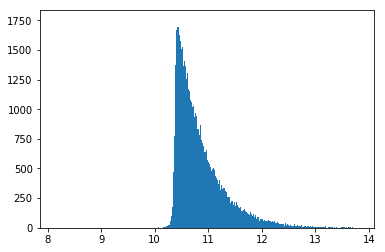

In [8]:
plt.hist(np.log10(masses), 1000)
plt.show()

### use halos above 10^13.5


In [16]:
mass_mask=[np.log10(masses)>13.5]
np.sum(mass_mask)

83

## density profiles 

In [23]:
rho = density(dic["profiles"])[mass_mask]
Rbin = dic["profiles"]['Rbin'][mass_mask]

#scale by r200crit
R200c = dic["profiles"]['R200c'][mass_mask]
Rbin_scaled = np.array([r[0]/r[1] for r in zip(Rbin,R200c)])

/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.
/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[se

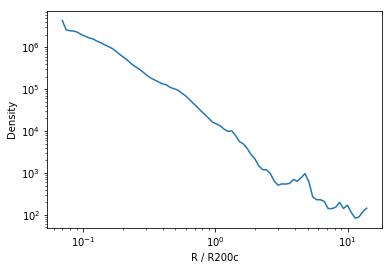

In [26]:
plt.loglog(Rbin_scaled[0], rho[0])

plt.xlabel('R / R200c')
plt.ylabel('Density')
plt.show()

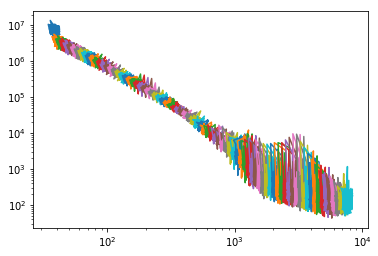

In [18]:
plt.loglog(Rbin, rho)

plt.xlabel('R / R200c')
plt.ylabel('Density')
plt.show()

## what are the units? 